## Deep Learning Model


### Model Pseudocode

In [ ]:
# Function create_cnn_model(input_shape):

#     Initialize Sequential model

#     Add Conv1D(32, kernel=3, padding='same', input_shape)
#     Add BatchNormalization
#     Add LeakyReLU(α=0.3)
#     Add MaxPooling1D(pool=2)

#     Add Conv1D(64, kernel=3, padding='same')
#     Add BatchNormalization
#     Add LeakyReLU(α=0.3)
#     Add MaxPooling1D(pool=2)

#     Add Conv1D(128, kernel=3, padding='same')
#     Add BatchNormalization
#     Add LeakyReLU(α=0.3)

#     Add GlobalAveragePooling1D

#     Add Dense(64) → BatchNormalization → LeakyReLU(α=0.3)
#     Add Dropout(0.25)

#     Add Output Dense(1, activation='sigmoid')

#     Compile model with:
#         optimizer = 'adam'
#         loss = 'binary_crossentropy'
#         metrics = ['accuracy']

#     Return model



### Step 1: Load and Prepare the Dataset

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('D:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\Data\selected.csv')
X = df.drop('Label', axis=1).values
y = df['Label'].values
X = X.reshape(X.shape[0], X.shape[1], 1)

# Flatten before scaling and reshape after
X_flat = X.reshape(X.shape[0], X.shape[1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_flat)

# Reshape back to 3D for CNN input
X = X_scaled.reshape(X.shape[0], X.shape[1], 1)

### Step 2: Setup K-Fold Cross-Validation

In [18]:

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Step 3: Defining the 1D CNN Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, LeakyReLU

def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv1D(32, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(0.25))  # Moderate regularization

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


##Initttaaallll Modelll
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# def create_improved_cnn_model(input_shape):
#     model = Sequential([
#         Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
#         BatchNormalization(),
#         MaxPooling1D(pool_size=2),

#         Conv1D(128, kernel_size=3, activation='relu'),
#         BatchNormalization(),
#         MaxPooling1D(pool_size=2),

#         Conv1D(256, kernel_size=3, activation='relu'),
#         BatchNormalization(),

#         Flatten(),
#         Dense(128, activation='relu'),
#         Dropout(0.3),  # Less aggressive than 0.5
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])

#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model



### Step 4: Training the Model using the K-Folds

In [22]:
accuracies = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\nTraining fold {fold+1}")
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_cnn_model(input_shape=X.shape[1:])

    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=64,
        validation_data=(X_val, y_val),
        verbose=1
    )

    loss, acc = model.evaluate(X_val, y_val)
    accuracies.append(acc)
    print(f"Fold {fold+1} Accuracy: {acc:.4f}")


Training fold 1
Epoch 1/30


d:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\syn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\syn\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9829 - loss: 0.0814 - val_accuracy: 0.5154 - val_loss: 0.8484
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9959 - loss: 0.0176 - val_accuracy: 0.5154 - val_loss: 0.9915
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0128 - val_accuracy: 0.7673 - val_loss: 0.3529
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0089 - val_accuracy: 0.7579 - val_loss: 0.4621
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0207 - val_accuracy: 0.9990 - val_

### Step 5: Evaluation 

In [23]:
import numpy as np

print("\nFinal CNN Cross-Validation Results:")
print(f"Fold Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")


Final CNN Cross-Validation Results:
Fold Accuracies: [1.0, 0.9994794130325317, 0.9973971843719482, 0.9979177713394165, 0.9973958134651184]
Mean Accuracy: 0.9984
Standard Deviation: 0.0011


### Step 6: Visual Evaluation  

Epoch 1/15


d:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\syn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\syn\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9736 - loss: 0.0742
Epoch 2/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0116
Epoch 3/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0094
Epoch 4/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0080
Epoch 5/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0082
Epoch 6/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0370
Epoch 7/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0082
Epoch 8/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0087
Epoch 9/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0057
Epoch 10/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0058
Epoch 11/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0042
Epoch 12/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

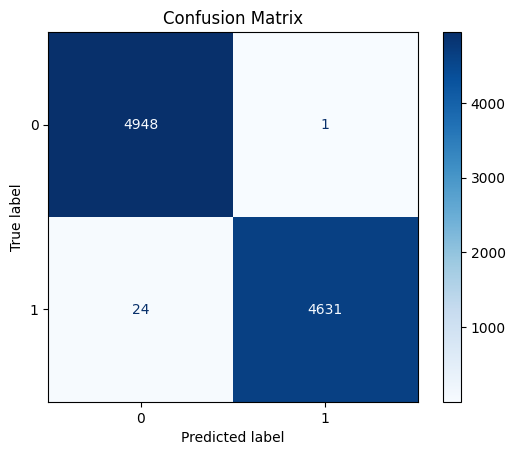

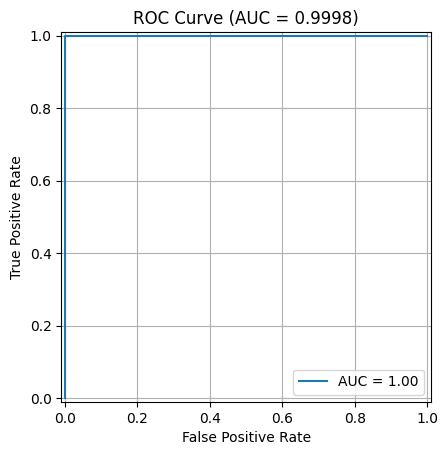

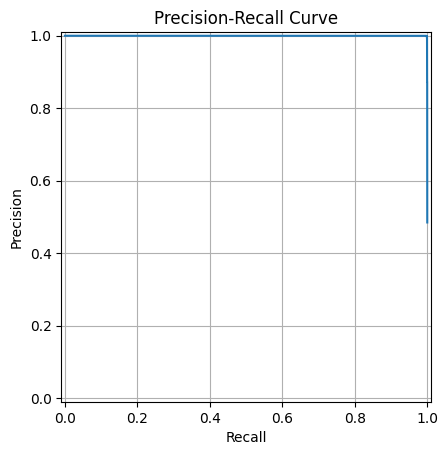

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)

# Re-train on the full dataset (or use last model from the loop)
final_model = create_cnn_model(input_shape=X.shape[1:])
final_model.fit(X, y, epochs=15, batch_size=64, verbose=1)

# Predict probabilities and labels
y_scores = final_model.predict(X).ravel()  # Probabilities
y_pred = (y_scores > 0.5).astype(int)      # Binary predictions

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f'ROC Curve (AUC = {roc_auc:.4f})')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y, y_scores)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
